In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas

In [2]:
data_path = '../outputs'

In [3]:
attack_runs = []

for folder in os.listdir(data_path):
    # if folder in dates:
    for root, dirs, files in os.walk(os.path.join(data_path, folder)):
        for file in files:
            if file.endswith('run.json'):
                print(os.path.join(root, file))
                data = pandas.read_json(os.path.join(root, file))
                for i in range(len(data)):
                    attack_runs.append(data.iloc[i])

../outputs/2024-09-27/13-06-52/run.json
../outputs/2024-10-08/11-31-49/run.json
../outputs/2024-10-08/15-30-39/run.json
../outputs/2024-10-08/11-30-44/run.json
../outputs/2024-10-08/15-31-30/run.json
../outputs/2024-10-08/08-55-43/run.json
../outputs/2024-10-08/16-21-23/run.json
../outputs/2024-10-08/08-54-47/run.json
../outputs/2024-10-08/08-54-33/run.json
../outputs/2024-10-08/08-55-40/run.json
../outputs/2024-10-08/15-16-23/run.json
../outputs/2024-10-08/15-31-06/run.json
../outputs/2024-10-08/13-32-43/run.json
../outputs/2024-10-08/10-41-26/run.json
../outputs/2024-10-08/15-32-39/run.json
../outputs/2024-10-08/16-11-53/run.json
../outputs/2024-09-23/08-08-41/run.json
../outputs/2024-09-19/16-43-36/run.json
../outputs/2024-10-04/12-27-49/run.json
../outputs/2024-09-20/10-02-14/run.json
../outputs/2024-09-20/10-55-38/run.json
../outputs/2024-09-20/10-58-07/run.json
../outputs/2024-09-20/09-43-25/run.json
../outputs/2024-09-20/11-07-06/run.json
../outputs/2024-09-20/10-03-46/run.json


In [4]:
indexed_attack_runs = {}

models = set([run['config']['model'] for run in attack_runs])
attacks = set([run['config']['attack'] for run in attack_runs])
datasets = set([run['config']['dataset'] for run in attack_runs])

for run in attack_runs:
    config = run['config']
    target = config['model']
    attack_type = config['attack']
    dataset = config['dataset']
    if any(d['num_examples'] != 20 for d in config['config']['datasets'].values()):
        continue


    if target not in indexed_attack_runs:
        indexed_attack_runs[target] = {}
    if attack_type not in indexed_attack_runs[target]:
        indexed_attack_runs[target][attack_type] = {}
    if dataset not in indexed_attack_runs[target][attack_type]:
        indexed_attack_runs[target][attack_type][dataset] = []

    indexed_attack_runs[target][attack_type][dataset].append(run)

# Example of accessing the indexed data
print(len(indexed_attack_runs))

7


qwen/Qwen2-7B-Instruct gcg adv_behaviors 0.3538752967026079
qwen/Qwen2-7B-Instruct gcg jbb_behaviors 0.38623331822454887
qwen/Qwen2-7B-Instruct pgd adv_behaviors 0.014658393014905843
qwen/Qwen2-7B-Instruct pgd adv_behaviors 0.3982264012098309
qwen/Qwen2-7B-Instruct autodan adv_behaviors 0.7614096760749813
ContinuousAT/Zephyr-CAT gcg adv_behaviors 2.899530804157257
ContinuousAT/Zephyr-CAT autodan adv_behaviors 4.42404944896698
ContinuousAT/Zephyr-CAT pgd adv_behaviors 0.07053085856605265
ContinuousAT/Zephyr-CAT pgd adv_behaviors 3.863724348316623e-05
mistralai/Mistral-7B-Instruct-v0.3 pgd adv_behaviors 2.8311838423178415e-05
mistralai/Mistral-7B-Instruct-v0.3 pgd adv_behaviors 0.01749392653000485
mistralai/Mistral-7B-Instruct-v0.3 pgd adv_behaviors 25.745366984931753
mistralai/Mistral-7B-Instruct-v0.3 gcg adv_behaviors 0.1017311025410885
mistralai/Mistral-7B-Instruct-v0.3 gcg adv_behaviors 0.0947148609440768
mistralai/Mistral-7B-Instruct-v0.3 gcg jbb_behaviors 0.11849277764558741
mistra

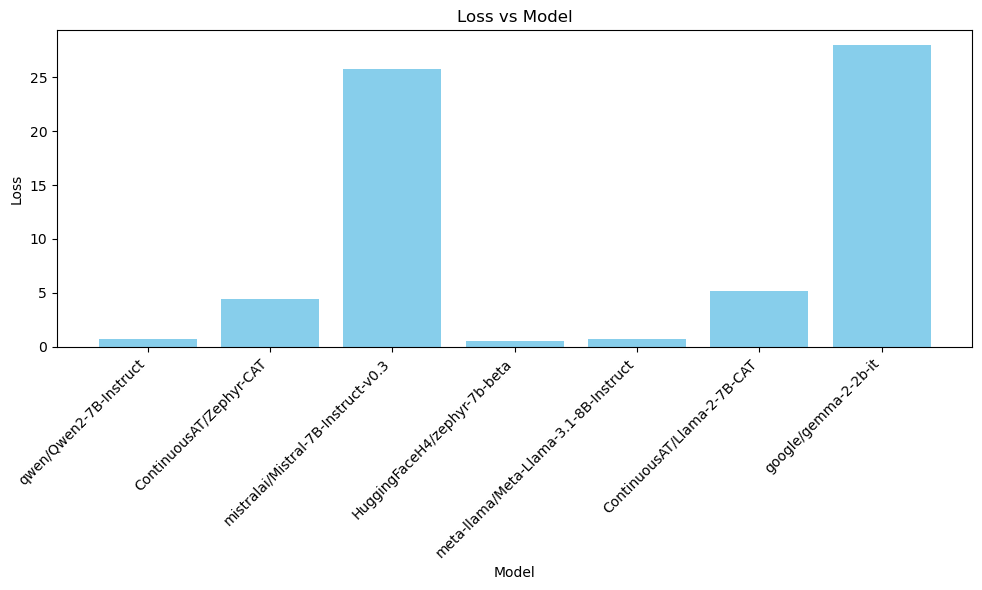

In [5]:
# Extracting the success rates and models
models = []
losses = []

for model, attacks in indexed_attack_runs.items():
    for attack, datasets in attacks.items():
        for dataset, runs in datasets.items():
            for run in runs:
                run_losses: list[list[float|None]] = run['losses']
                run_losses = np.mean([np.min([s_ for s_ in s if s_ is not None]) for s in run['losses']])

                print(f'{model} {attack} {dataset} {run_losses}')
                models.append(model)
                losses.append(run_losses)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(models, losses, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Loss vs Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
# Extracting the success rates and models
models = []
losses = []

for model, attacks in indexed_attack_runs.items():
    for attack, datasets in attacks.items():
        if attack != 'pgd':
            continue
        for dataset, runs in datasets.items():
            if dataset != 'adv_behaviors':
                continue
            for run in runs:
                run_losses: list[list[float|None]] = run['successes_cais']
                run_losses = np.mean([min([s_ == 'Yes' for s_ in s if s_ is not None], default=0) for s in run['successes_cais']])
                print(f'{model} {attack} {dataset} {run_losses}')
                models.append("|".join((model, dataset, attack)))
                losses.append(run_losses)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(models, losses, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Avg. Score')
plt.title('Attack Score vs Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

KeyError: 'successes_cais'